In [1]:
import pandas as pd

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
df = pd.read_csv('../data/unemployee_1997.csv')

# display the first 5 rows
df.head()

/home/asitha/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6,24,26,78,81,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,SECTOR,DISTRICT,PSU_NO,HH_NO,BLANK,RES_1,RES_2,RES_3,...,Q36_AVAILABLE_FOR_WORK,Q37_LOOKING_FOR_WORK_IN_EACH,Q38_THIS_PERSON_WAS,Q39_MAIN_OCCUPATION,Q40A_MULTIPLY_WAGE_DAYS_WORKED,Q40B_ANY_PAYMENTS_IN_KIND,Q41_EMPLOYER_THE_SECONDARY_ACTIV,Q42A_EARNING_FROM_SECOND_JOB,Q42B_ANY_PAYMENTS_IN_KIND,INFLATION_FACTOR
0,1997,1,1,1,37,1,2,1,,,...,2,,2,2,,,2,,,237.8926
1,1997,1,1,1,37,1,3,1,,,...,2,,2,2,,,2,,,237.8926
2,1997,1,1,1,37,1,4,1,,,...,2,,2,2,,,2,,,237.8926
3,1997,1,1,1,37,2,2,1,,,...,2,,2,2,,,2,,,237.8926
4,1997,1,1,1,37,2,3,1,,,...,2,,2,2,,,2,,,237.8926


In [3]:
# display the last 5 rows
df.tail()

,YEAR,MONTH,SECTOR,DISTRICT,PSU_NO,HH_NO,BLANK,RES_1,RES_2,RES_3,...,Q36_AVAILABLE_FOR_WORK,Q37_LOOKING_FOR_WORK_IN_EACH,Q38_THIS_PERSON_WAS,Q39_MAIN_OCCUPATION,Q40A_MULTIPLY_WAGE_DAYS_WORKED,Q40B_ANY_PAYMENTS_IN_KIND,Q41_EMPLOYER_THE_SECONDARY_ACTIV,Q42A_EARNING_FROM_SECOND_JOB,Q42B_ANY_PAYMENTS_IN_KIND,INFLATION_FACTOR
39320,1997,12,2,25,131,74,4,1,,,...,2,,2,2,,,2,,,205.1312
39321,1997,12,2,25,131,75,3,1,,,...,2,,2,2,,,2,,,205.1312
39322,1997,12,2,25,131,76,1,1,,,...,2,,2,2,,,2,,,205.1312
39323,1997,12,2,25,131,76,3,1,,,...,2,,2,2,,,2,,,205.1312
39324,1997,12,2,25,131,76,4,1,,,...,2,,2,2,,,2,,,205.1312


In [4]:
# check the shape of the DataFrame (rows, columns)
df.shape

(39325, 88)

### Data Preprocessing

#### 1. Replcaing empty cells with NaN(Not a number)

In [5]:
import numpy as np
df.replace(' ', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)
df.replace('    ', np.nan, inplace=True)
df.replace('     ', np.nan, inplace=True)
df.head()

,YEAR,MONTH,SECTOR,DISTRICT,PSU_NO,HH_NO,BLANK,RES_1,RES_2,RES_3,...,Q36_AVAILABLE_FOR_WORK,Q37_LOOKING_FOR_WORK_IN_EACH,Q38_THIS_PERSON_WAS,Q39_MAIN_OCCUPATION,Q40A_MULTIPLY_WAGE_DAYS_WORKED,Q40B_ANY_PAYMENTS_IN_KIND,Q41_EMPLOYER_THE_SECONDARY_ACTIV,Q42A_EARNING_FROM_SECOND_JOB,Q42B_ANY_PAYMENTS_IN_KIND,INFLATION_FACTOR
0,1997,1,1,1,37,1,2,1,NaN,NaN,...,2,NaN,2,2,NaN,NaN,2,NaN,NaN,237.8926
1,1997,1,1,1,37,1,3,1,NaN,NaN,...,2,NaN,2,2,NaN,NaN,2,NaN,NaN,237.8926
2,1997,1,1,1,37,1,4,1,NaN,NaN,...,2,NaN,2,2,NaN,NaN,2,NaN,NaN,237.8926
3,1997,1,1,1,37,2,2,1,NaN,NaN,...,2,NaN,2,2,NaN,NaN,2,NaN,NaN,237.8926
4,1997,1,1,1,37,2,3,1,NaN,NaN,...,2,NaN,2,2,NaN,NaN,2,NaN,NaN,237.8926


#### 2. Drop columns with NaN values 

In [6]:
df = df.dropna(axis=1, how='all')

#### NOTE: Best way to handle missing data

**Eliminating and Imputing** are two different strategies for handling samples or features with missing values.

Eliminating simply we remove the corresponding features (columns) or samples (rows) from the dataset entirely that have a certain number of missing values. The disadvantages for this strategy, we will run the risk of losing valuable information that our classifier needs to discriminate between classes.

Imputing we handle missing data by applying different interpolation techniques to estimate the missing values. One of the most common interpolation techniques is mean imputation, where we simply replace the missing value by the mean value of the entire feature column. A convenient way to achieve this is by using the Imputer class from scikit-learn, but filling missing values with this way is also a prediction which ignore the relation between missing values and other features.

Visualizing the important characteristics of a dataset is an important and recommended first step to clarifying the correlation between features to guide us to use a regression or another simple model to predict the values of missing variables. We have tried imputation here because we cannot loose data records.

#### 2. Imputation of missing values

##### i. Univariate vs. Multivariate Imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer). As we can see we have to try multivariate imputation because it is the most sophisticated approach is to use. (***IterativeImputer class***)

In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)
idf=pd.DataFrame(imp.fit_transform(df))
idf.columns=df.columns
idf.index=df.index

In [8]:
idf.head()

,YEAR,MONTH,SECTOR,DISTRICT,PSU_NO,HH_NO,BLANK,RES_1,RES_2,RES_3,...,Q36_AVAILABLE_FOR_WORK,Q37_LOOKING_FOR_WORK_IN_EACH,Q38_THIS_PERSON_WAS,Q39_MAIN_OCCUPATION,Q40A_MULTIPLY_WAGE_DAYS_WORKED,Q40B_ANY_PAYMENTS_IN_KIND,Q41_EMPLOYER_THE_SECONDARY_ACTIV,Q42A_EARNING_FROM_SECOND_JOB,Q42B_ANY_PAYMENTS_IN_KIND,INFLATION_FACTOR
0,1997.0,1.0,1.0,1.0,37.0,1.0,2.0,1.0,5.297143,1.164948,...,2.0,44.358426,2.0,2.0,2107.610644,1.809649,2.0,1002.730769,1.842105,237.8926
1,1997.0,1.0,1.0,1.0,37.0,1.0,3.0,1.0,5.297143,1.164948,...,2.0,44.358426,2.0,2.0,2107.610644,1.809649,2.0,1002.730769,1.842105,237.8926
2,1997.0,1.0,1.0,1.0,37.0,1.0,4.0,1.0,5.297143,1.164948,...,2.0,44.358426,2.0,2.0,2107.610644,1.809649,2.0,1002.730769,1.842105,237.8926
3,1997.0,1.0,1.0,1.0,37.0,2.0,2.0,1.0,5.297143,1.164948,...,2.0,44.358426,2.0,2.0,2107.610644,1.809649,2.0,1002.730769,1.842105,237.8926
4,1997.0,1.0,1.0,1.0,37.0,2.0,3.0,1.0,5.297143,1.164948,...,2.0,44.358426,2.0,2.0,2107.610644,1.809649,2.0,1002.730769,1.842105,237.8926


In [9]:
X = idf.drop(['INFLATION_FACTOR'], axis=1)
y = idf['INFLATION_FACTOR']

# Feature selection

#### Plotting original data with regression line

/home/asitha/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


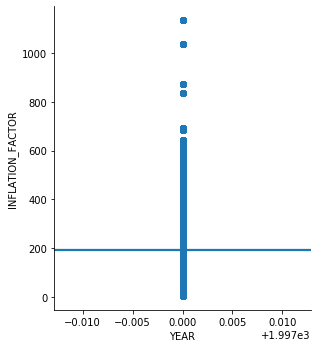

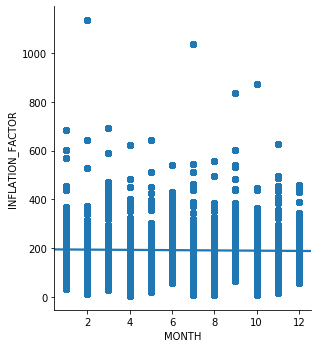

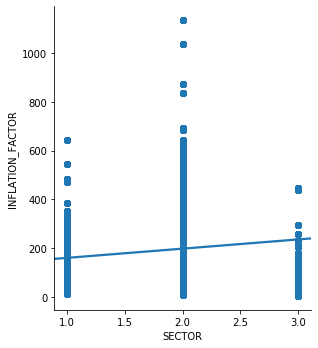

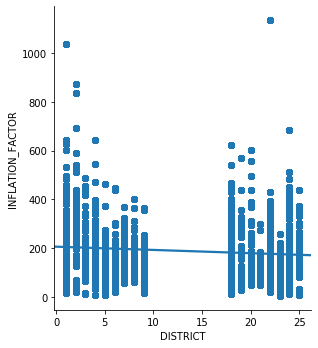

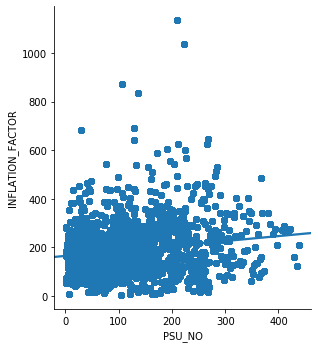

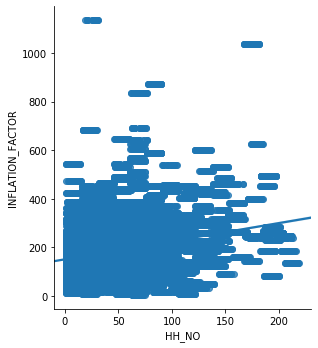

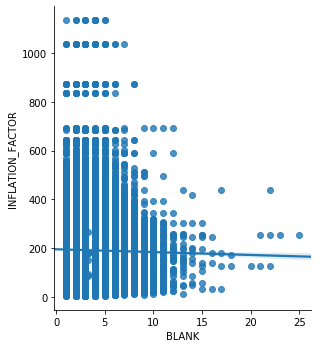

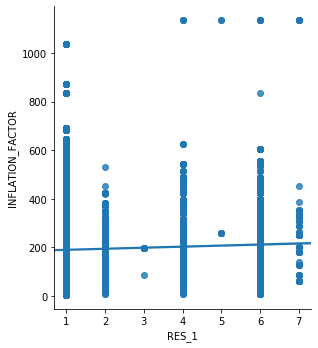

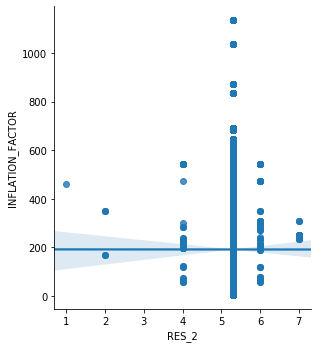

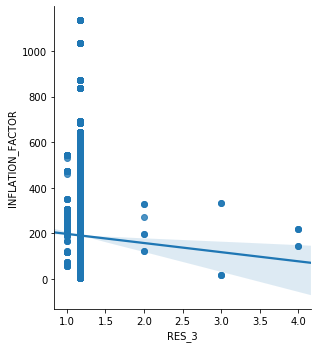

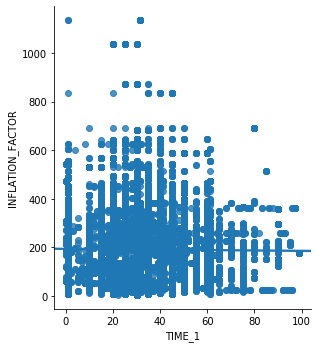

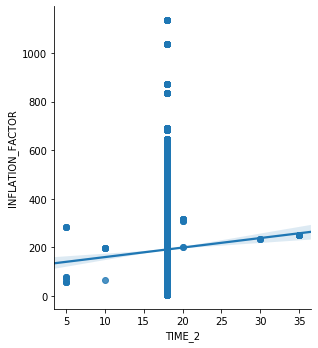

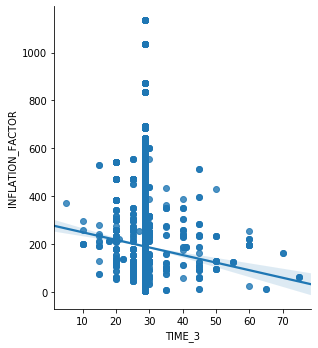

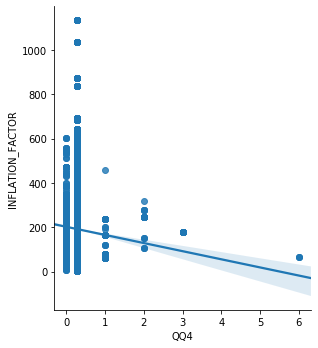

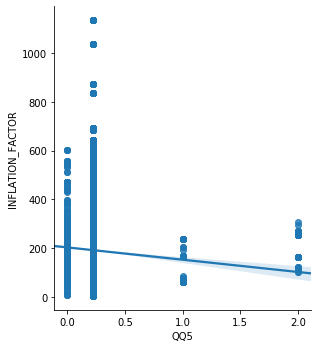

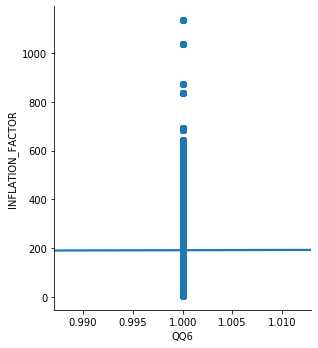

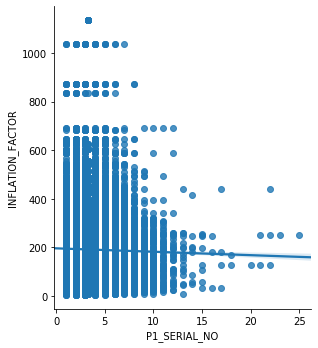

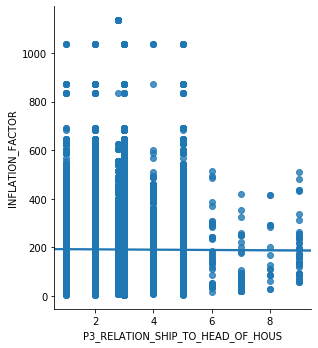

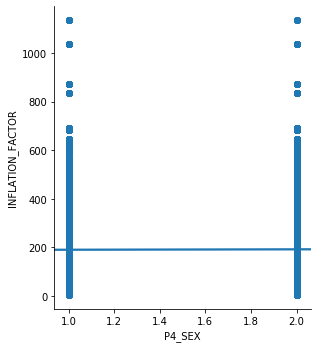

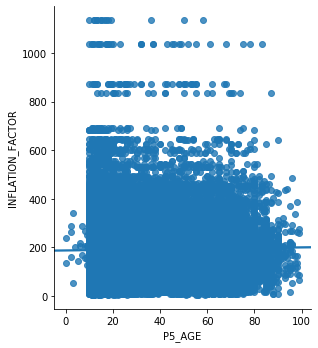

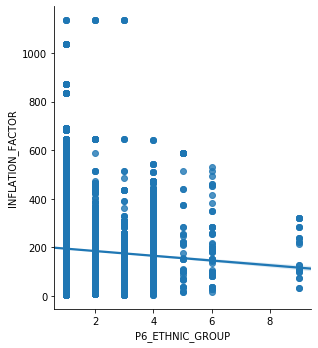

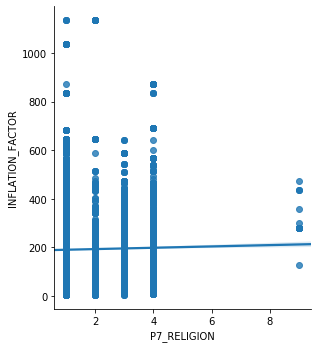

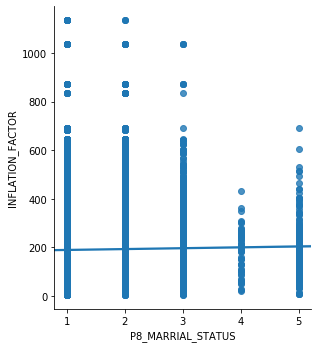

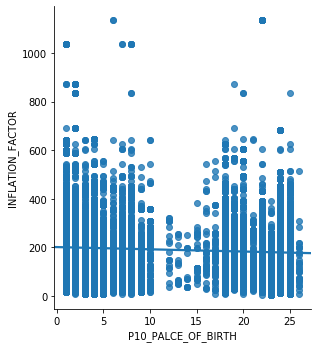

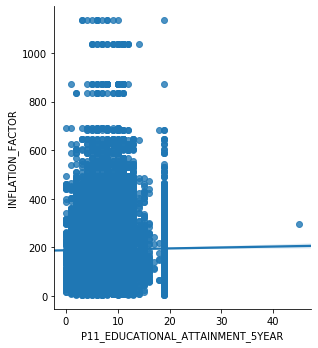

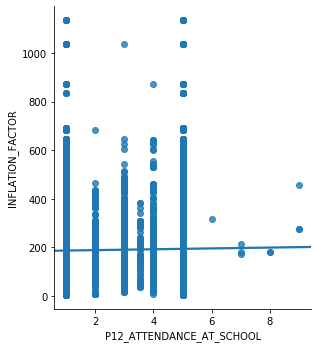

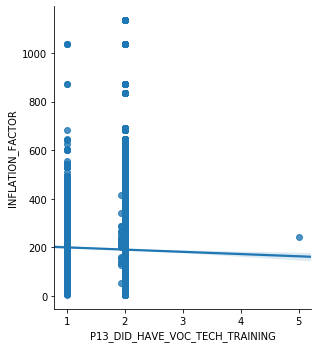

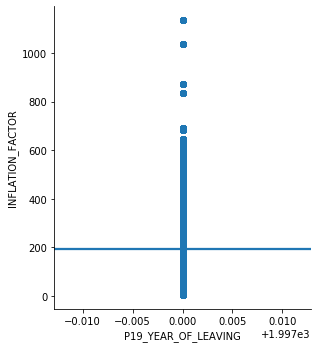

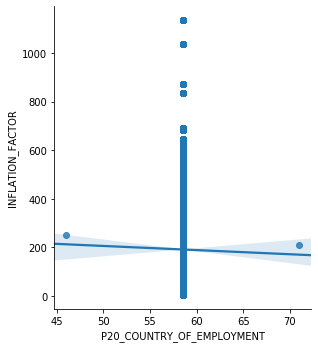

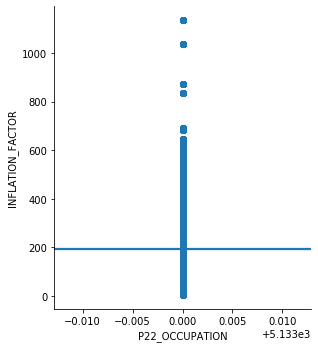

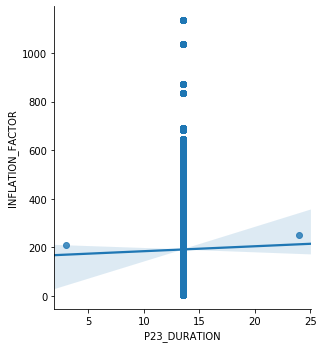

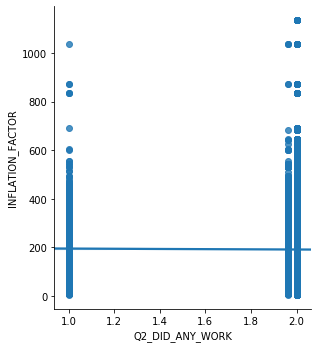

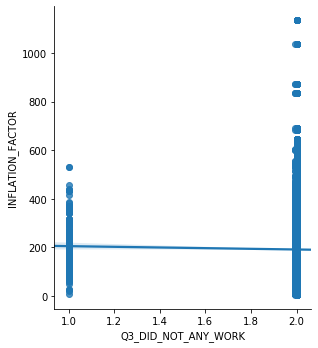

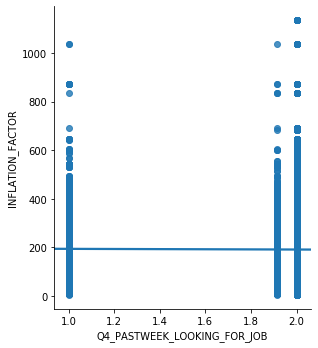

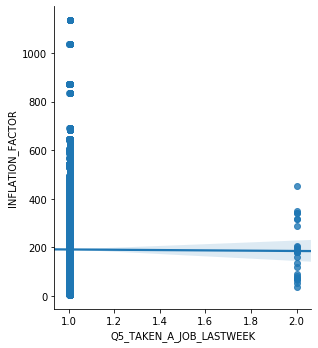

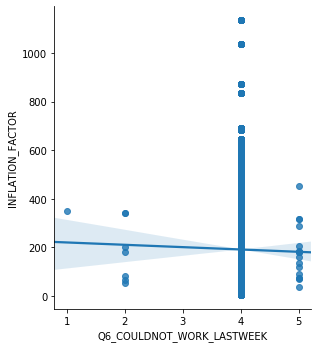

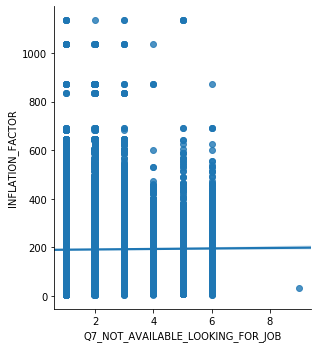

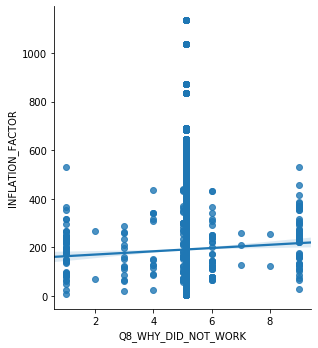

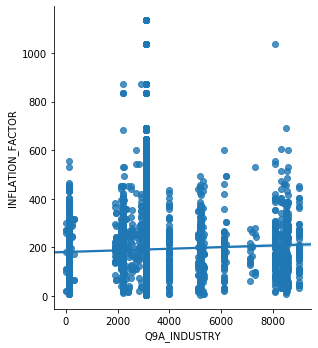

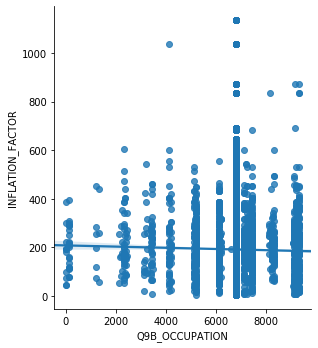

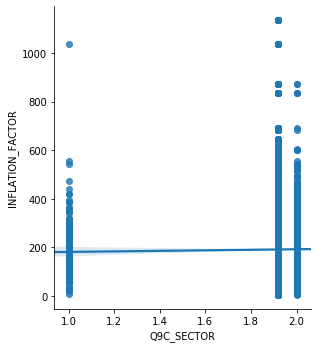

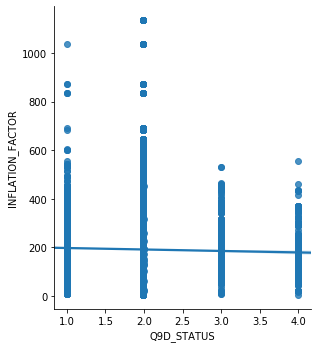

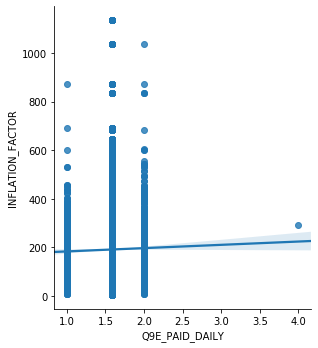

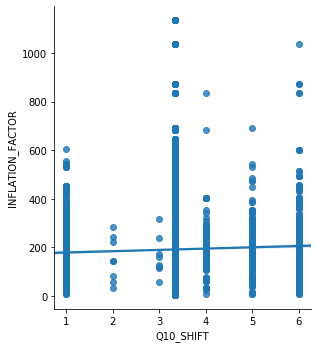

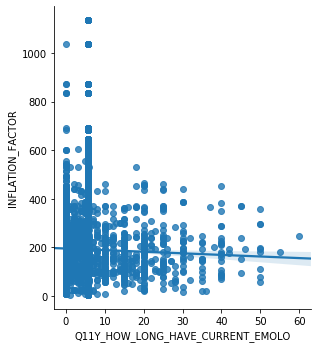

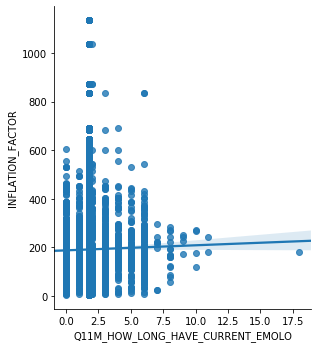

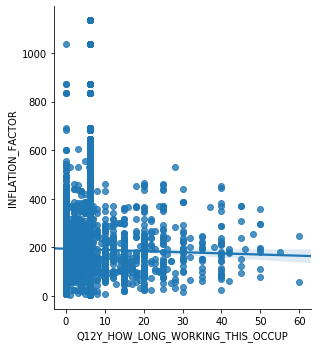

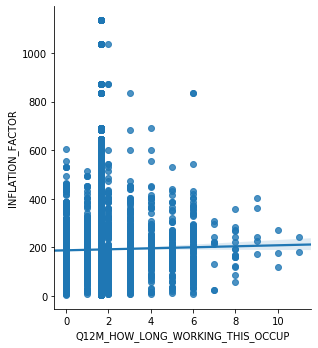

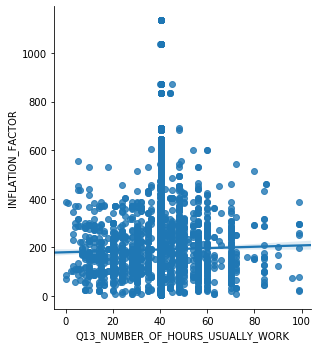

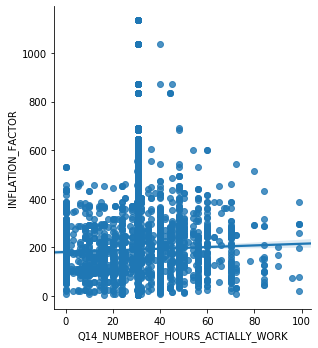

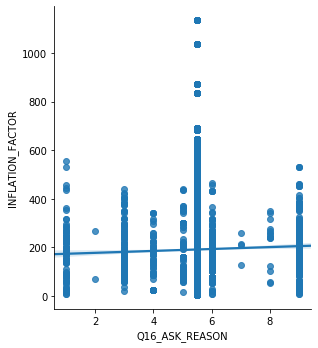

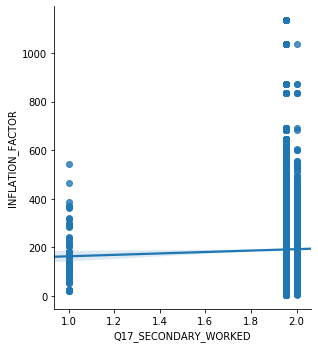

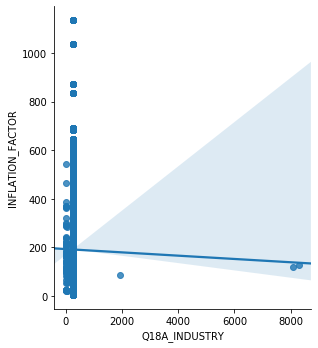

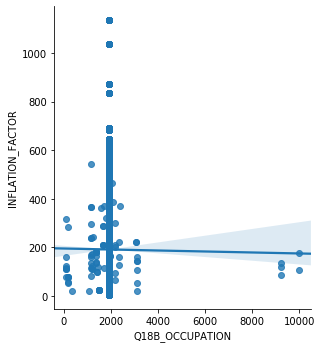

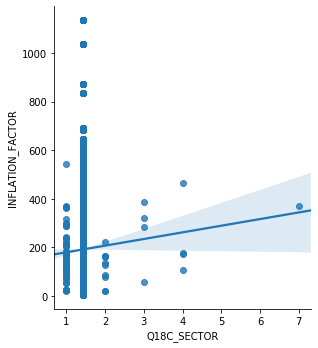

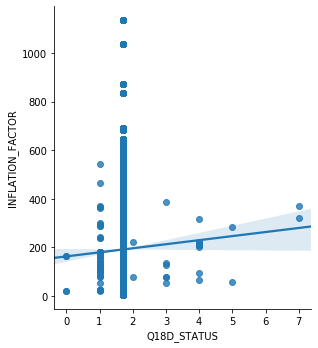

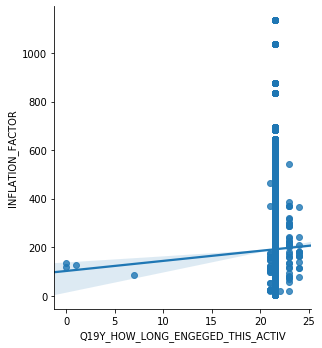

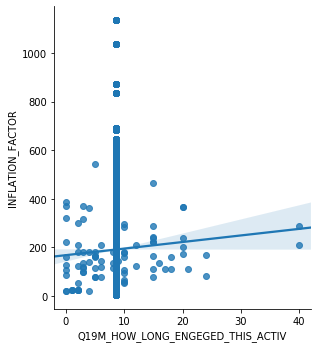

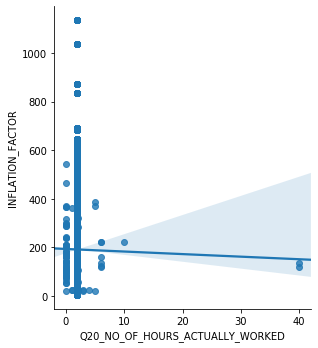

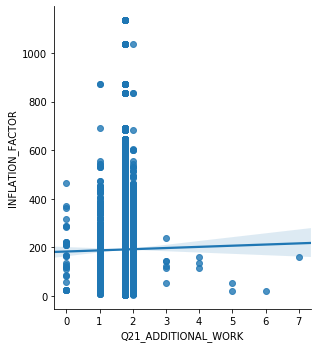

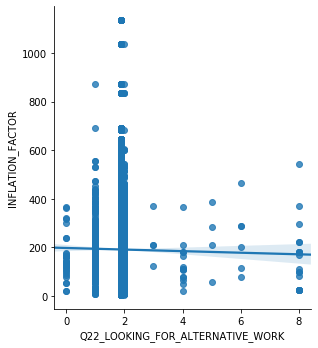

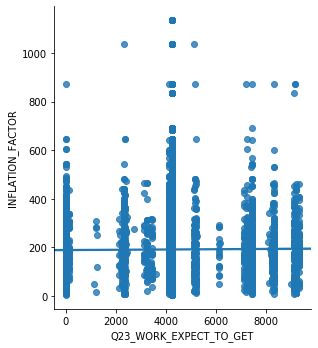

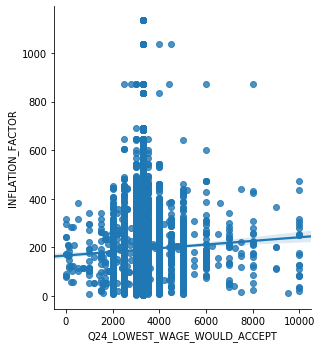

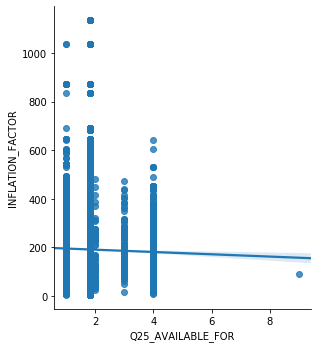

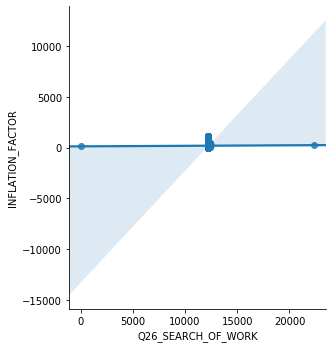

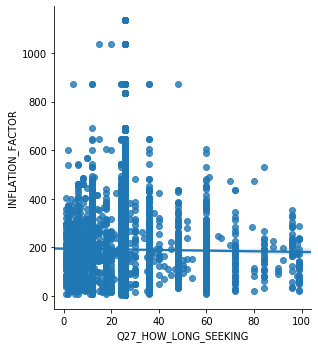

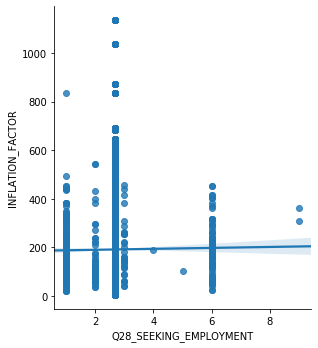

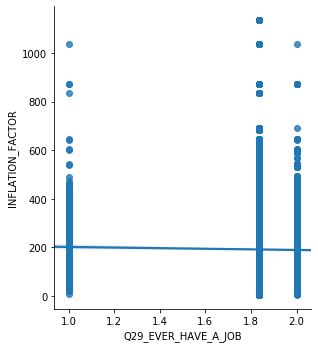

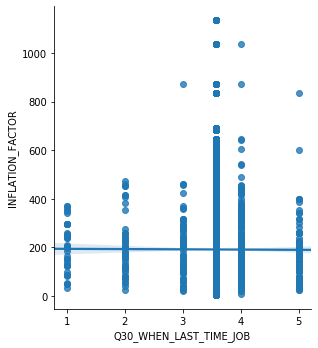

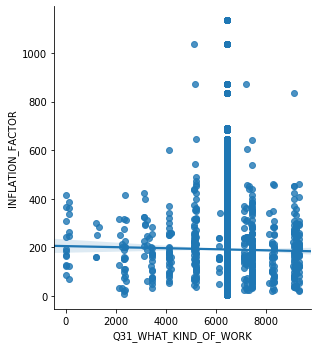

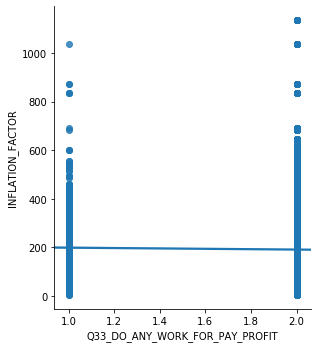

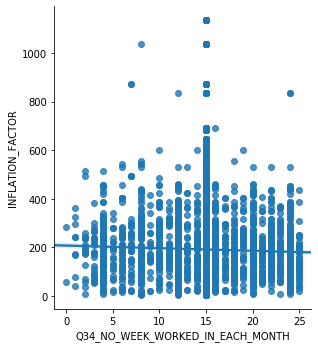

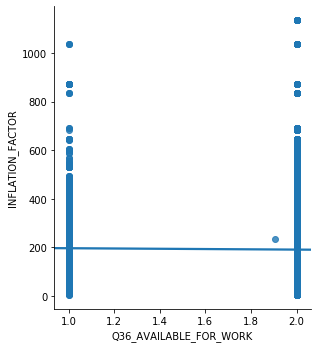

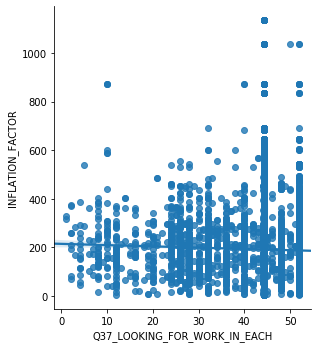

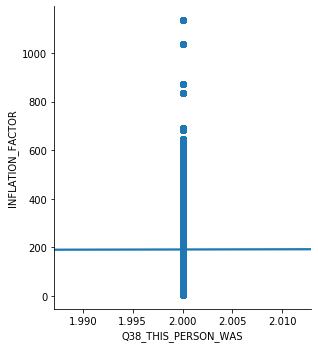

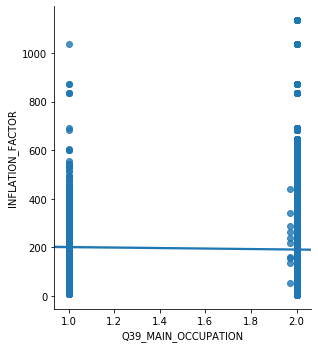

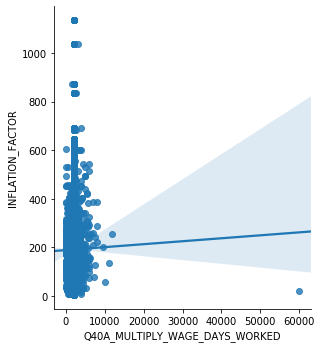

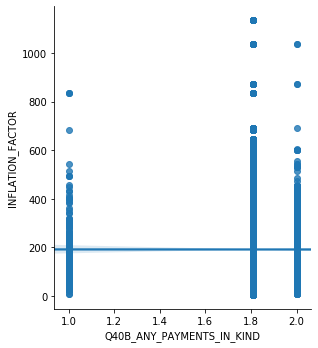

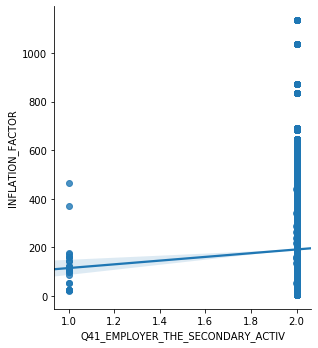

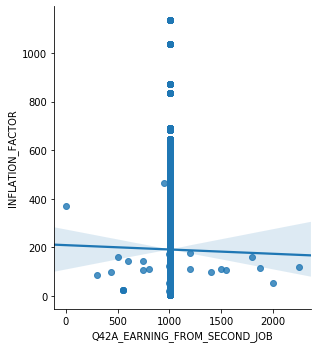

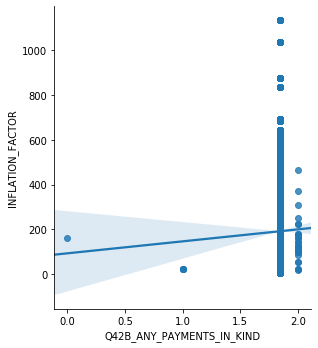

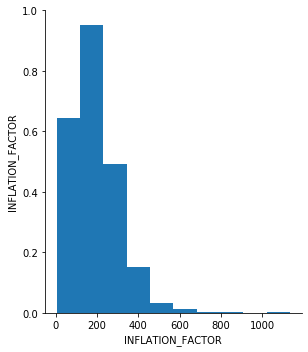

In [10]:
import seaborn as sns
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
for i in idf.columns:
    sns.pairplot(idf, x_vars=i, y_vars='INFLATION_FACTOR', height=5, aspect=0.9, kind='reg')

Feature selection can be done in multiple ways but there are broadly 3 categories of it.
1. Filter Method
2. Wrapper Method
3. Embedded Method

(NOTE: 2 and 3 method are suited when lesser features (~20). Since there are more than 20 features we will use filter method.)

### 1. Filter Method
Plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable. We will only select features which has correlation of above 0.5.

#### Pearson correlation heatmap

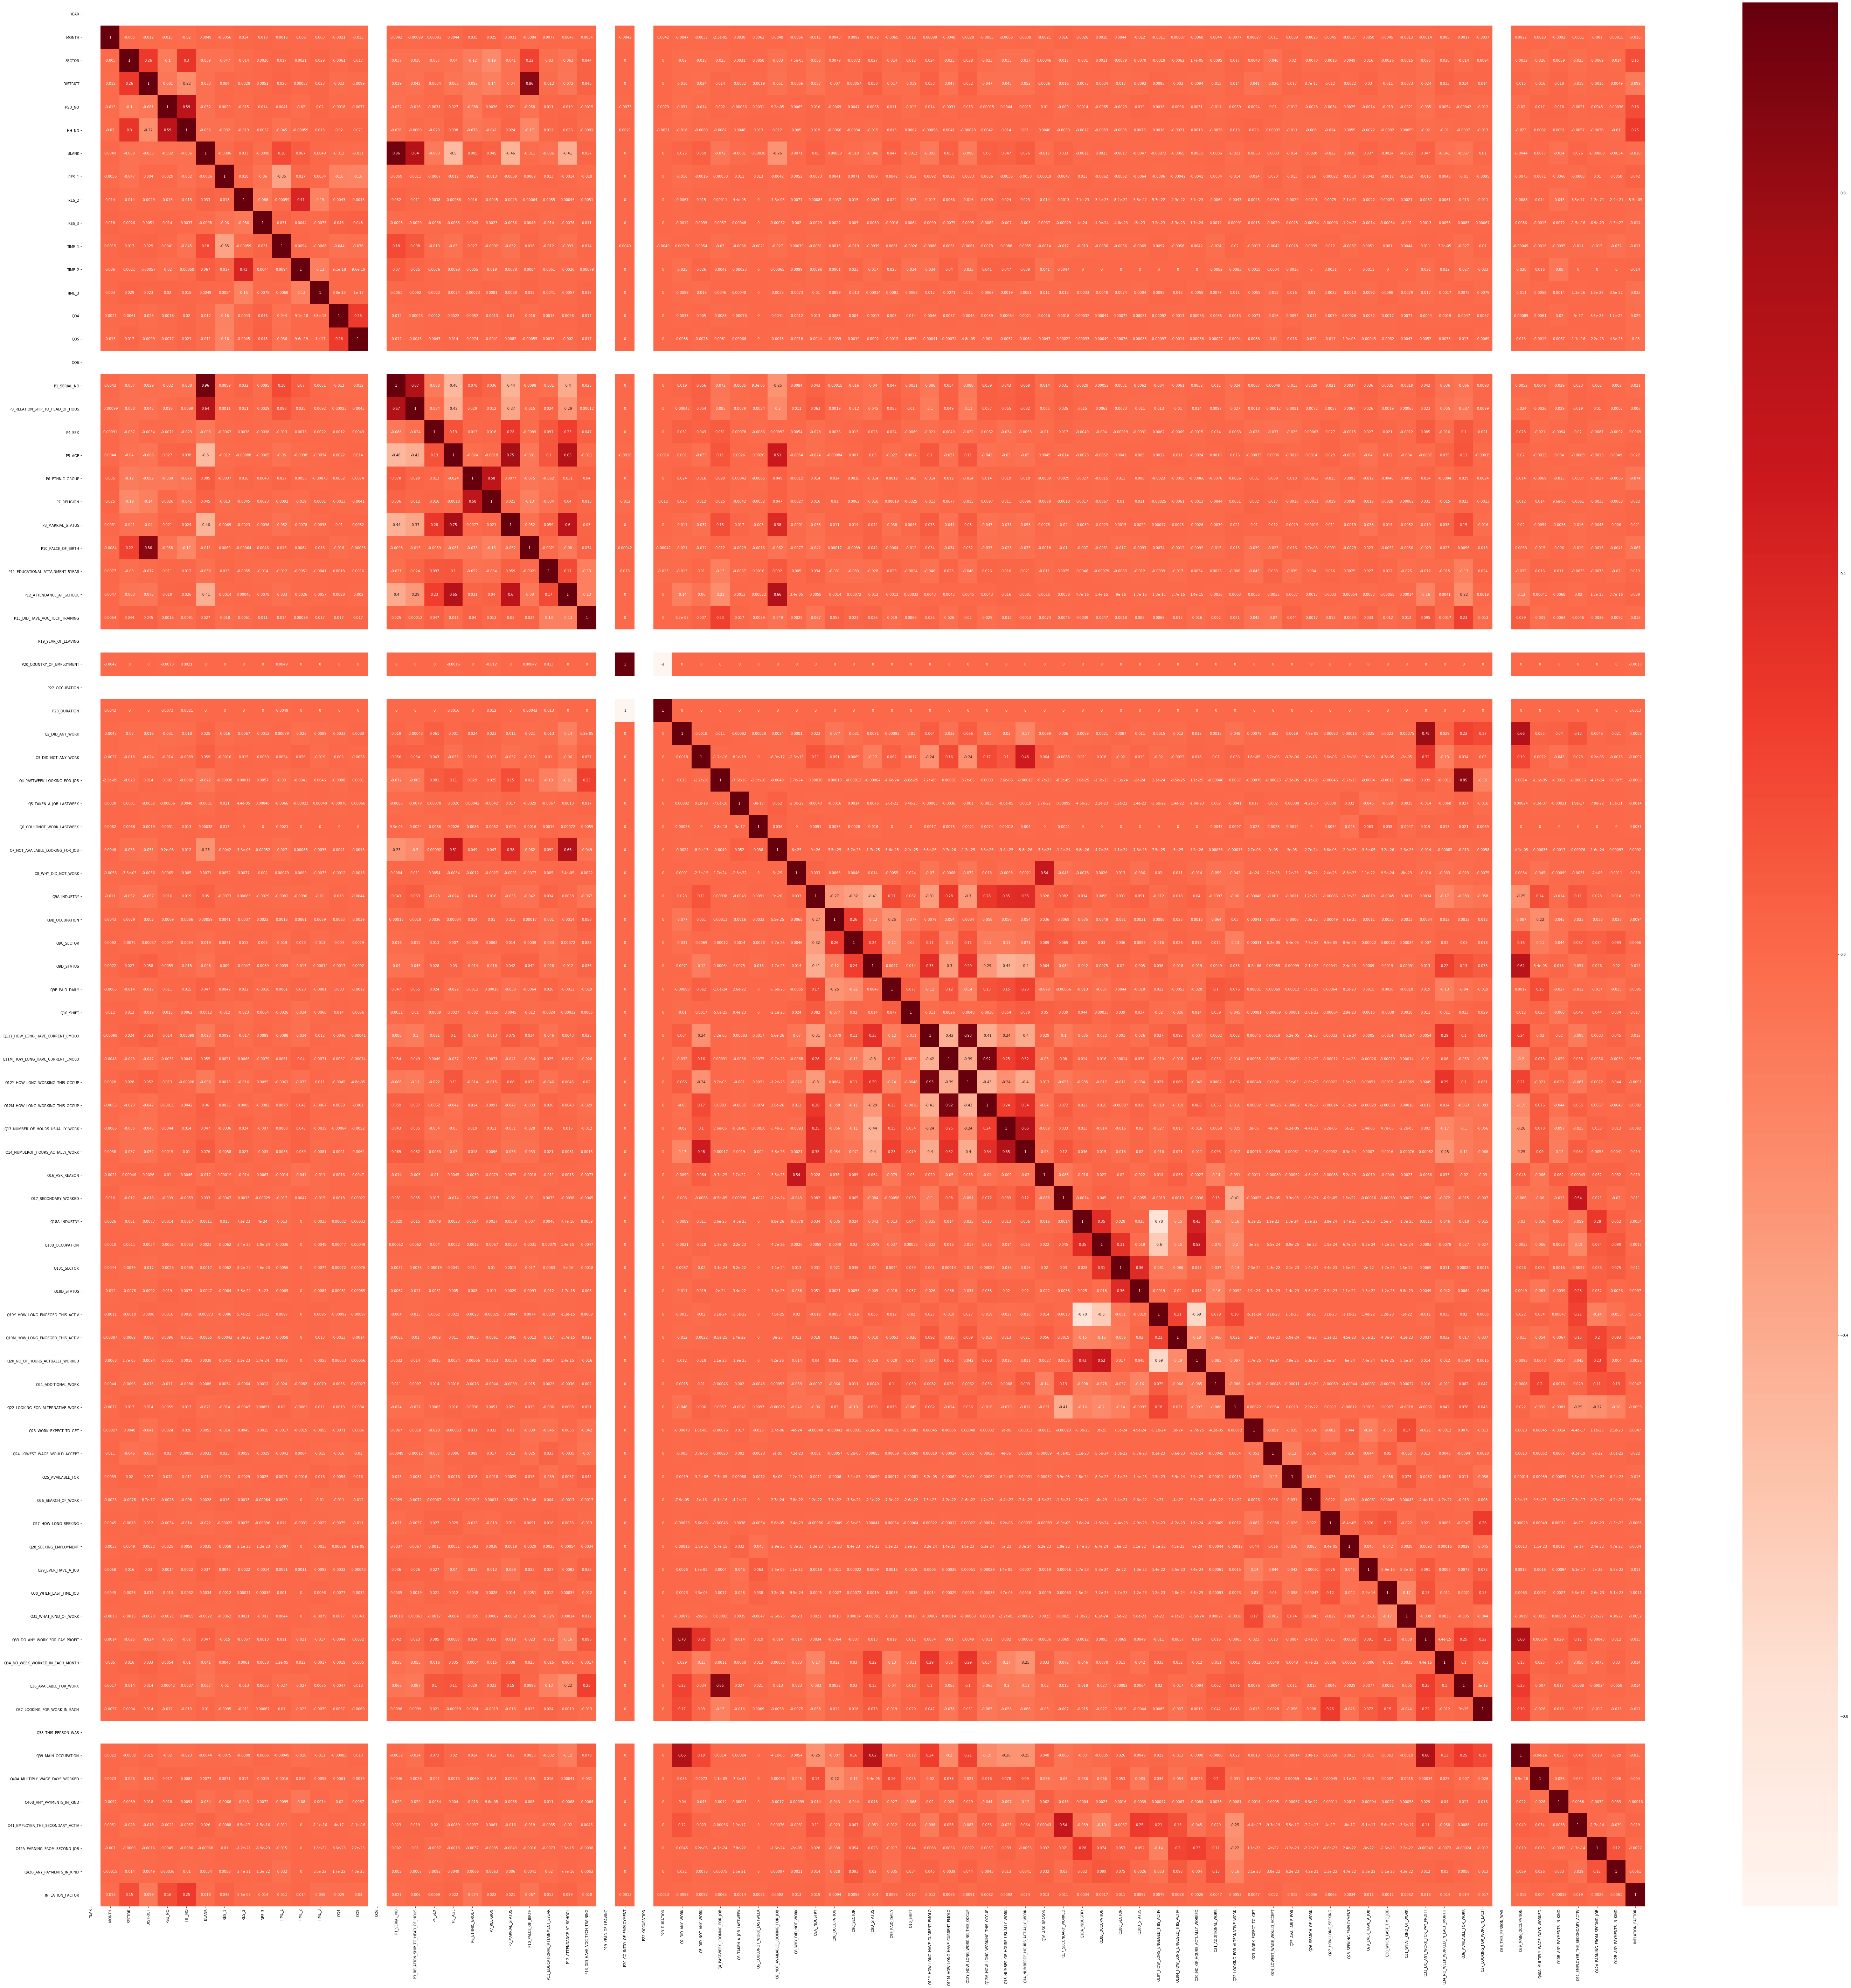

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#Using Pearson Correlation
plt.figure(figsize=(100,100))
cor = idf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Getting the selected features using correltion matrix

In [12]:
#Correlation with output variable
cor_target = abs(cor["INFLATION_FACTOR"])#Selecting highly correlated features
selected_features_FM = cor_target[cor_target>=0.5]
selected_features_FM = list(selected_features_FM.keys())
selected_features_FM

['INFLATION_FACTOR']

### 2. Wrapper Method
Feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

There are different wrapper methods such as Backward Elimination, Forward Selection, Bidirectional Elimination and RFE.

#### i. Backward Elimination
Check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [26]:
# import statsmodels.api as sm
# #Backward Elimination
# cols = list(X.columns)
# pmax = 1
# while (len(cols)>0):
#     p= []
#     X_1 = X[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y,X_1).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         break
# selected_features_BE = cols
# print(selected_features_BE)

### NOTE: Since there are more than 20 feature we have used filter method. But filter method does not works with this dataset as we expected. So we have used backward eleimintaion. 

What are the features?
- **MONTH:**
- **SECTOR:**
- **DISTRICT:**
- **HH_NO:**
- **BLANK:** etc.

What is the response?
- **INFLATION_FACTOR**

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 80017 **observations** (represented by the rows), and each observation is a single labour.

### Test the model with the subset of selected features and features that we need to check

In [15]:
# use the list to select a subset of the original DataFrame
research_features = ['YEAR', 'DISTRICT', 'P4_SEX', 'P5_AGE']
X = idf[research_features]

# print the first 5 rows
X.head()

,YEAR,DISTRICT,P4_SEX,P5_AGE
0,1997.0,1.0,2.0,32.0
1,1997.0,1.0,2.0,14.0
2,1997.0,1.0,1.0,13.0
3,1997.0,1.0,2.0,44.0
4,1997.0,1.0,2.0,50.0


In [16]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(39325, 4)


In [17]:
# select a Series from the DataFrame
y = idf['INFLATION_FACTOR']

# print the first 5 values
y.head()

0    237.8926
1    237.8926
2    237.8926
3    237.8926
4    237.8926
Name: INFLATION_FACTOR, dtype: float64

In [18]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(39325,)


## Splitting X and y into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)

In [20]:
# default split is 80% for training and 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31460, 4)
(31460,)
(7865, 4)
(7865,)


## Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Finding the best linear regression algorithm

In [22]:
#import sklearn regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor

#Dictionary of all models. All models intialized with no args. Can modify any of them to test various args.
# Error: RadiusNeighborsRegressor, ARDRegression, GaussianProcessRegressor, TheilSenRegressor, 
#SGDRegressor, KernelRidge, RANSACRegressor
models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'ElasticNet': ElasticNet(),
          'Lars': Lars(),
          'OrthogonalMatchingPursuit': OrthogonalMatchingPursuit(),
          'BayesianRidge': BayesianRidge(),
          'PassiveAggressiveRegressor': PassiveAggressiveRegressor(),
          'HuberRegressor': HuberRegressor(),
          'DecisionTreeRegressor': DecisionTreeRegressor(),
          'MLPRegressor': MLPRegressor(),
          'KNeighborsRegressor': KNeighborsRegressor(),
          'SVR': SVR(gamma='scale'),
          'NuSVR': NuSVR(gamma='scale'),
          'LinearSVR': LinearSVR(),
          'RandomForestRegressor': RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
         }

### NOTE: Non-linear Regressors
#### Decision Trees
Decision Trees, also referred to as Classification and Regression Trees (CART), work for both categorical and continuous input and output variables. It works by splitting the data into two or more homogeneous sets based on the most significant splitter among the independent variables. The best differentiator is the one that minimizes the cost metric. The cost metrics for a classification tree is often the entropy or the gini index, whereas, for a regression tree, the default metric is the mean squared error.
#### Random Forest
Decision Trees are useful, but the problem is that they often tend to overfit the training data leading to high variances in the test data. Random Forest algorithms overcome this shortcoming by reducing the variance of the decision trees. They are called 'Forest' because they are the collection, or ensemble, of several decision trees. One major difference between a Decision Tree and a Random Forest model is on how the splits happen. In Random Forest, instead of trying splits on all the features, a sample of features is selected for each split, thereby reducing the variance of the model

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

#### NOTE: We have used MSE

In [23]:
#Import non-sklearn packages
import numpy as np
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

print_coef = False

for key, model in models.items():
    begin = time.time()
    model.fit(X_train,y_train)
    print(key + ' Train time: ' + str((time.time() - begin)/60) + " minutes")
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test,preds)
    r2 = r2_score(y_test,preds)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(key + ' MSE: ' + str(mse))
    print(key + ' R2 ' + str(r2))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    if print_coef:
        print('Coefficients:')
        print(model.coef_)
    print('')

LinearRegression Train time: 0.0061698317527771 minutes
LinearRegression MSE: 13590.960280019728
LinearRegression R2 0.011553678982278104
Accuracy: 0.01 (+/- 0.00)

Ridge Train time: 0.0011876185735066732 minutes
Ridge MSE: 13590.961036114513
Ridge R2 0.01155362399285187
Accuracy: 0.01 (+/- 0.00)

Lasso Train time: 0.0003313740094502767 minutes
Lasso MSE: 13595.961668114775
Lasso R2 0.011189936938987954
Accuracy: 0.01 (+/- 0.00)

ElasticNet Train time: 3.293752670288086e-05 minutes
ElasticNet MSE: 13618.030288864948
ElasticNet R2 0.009584925479826256
Accuracy: 0.01 (+/- 0.00)

Lars Train time: 0.0007447481155395507 minutes
Lars MSE: 13590.960280019728
Lars R2 0.011553678982278104
Accuracy: 0.01 (+/- 0.00)

OrthogonalMatchingPursuit Train time: 4.051526387532552e-05 minutes
OrthogonalMatchingPursuit MSE: 13595.418675307503
OrthogonalMatchingPursuit R2 0.011229427838205464
Accuracy: 0.01 (+/- 0.00)

BayesianRidge Train time: 5.228916803995768e-05 minutes
BayesianRidge MSE: 13591.20802141

/home/asitha/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor Train time: 0.36547224124272665 minutes


/home/asitha/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/asitha/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/asitha/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/asitha/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

MLPRegressor MSE: 13209.67816178065
MLPRegressor R2 0.03928364796742134
Accuracy: 0.04 (+/- 0.01)

KNeighborsRegressor Train time: 0.004715418815612793 minutes
KNeighborsRegressor MSE: 14518.65924907856
KNeighborsRegressor R2 -0.05591621380566569
Accuracy: -0.07 (+/- 0.03)

SVR Train time: 0.689691428343455 minutes
SVR MSE: 13698.59292720125
SVR R2 0.0037257483625133814
Accuracy: 0.00 (+/- 0.01)

NuSVR Train time: 0.8186639547348022 minutes
NuSVR MSE: 13526.665262068727
NuSVR R2 0.016229741059132552
Accuracy: 0.01 (+/- 0.01)

LinearSVR Train time: 0.006775001684824626 minutes
LinearSVR MSE: 13950.922703794704
LinearSVR R2 -0.014625746617844326
Accuracy: -0.02 (+/- 0.01)

RandomForestRegressor Train time: 0.1953616221745809 minutes
RandomForestRegressor MSE: 13056.802007703345
RandomForestRegressor R2 0.050402058216268864
Accuracy: 0.04 (+/- 0.01)



### Select the best model (Which has the hieghest accuary and heighest speed)

In [24]:
begin = time.time()
best_model = LinearRegression()
best_model_name = 'LinearRegressor'
best_model.fit(X_train,y_train)
print(best_model_name + ' Train time: ' + str((time.time() - begin)/60) + " minutes")
preds = best_model.predict(X_test)
mse = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(best_model_name + ' MSE: ' + str(mse))
print(best_model_name + ' R2 ' + str(r2))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LinearRegressor Train time: 0.00011814435323079428 minutes
LinearRegressor MSE: 13590.960280019728
LinearRegressor R2 0.011553678982278104
Accuracy: 0.01 (+/- 0.00)


In [25]:
import pickle
# save the model to disk
filename = '../models/unemployee.sav'
pickle.dump(best_model, open(filename, 'wb'))